In [37]:

from tensorflow import keras
from tensorflow.keras import layers
import sys
sys.path.append("..")
from src.data import Dataset
from src.model import NeuralNetwork

# Training set

In [38]:
d = Dataset(dataset_path="../data/processed/train_07_18_2021.csv")
x_train, x_val, y_train, y_val = d.get_splits()

# Building the network

In [39]:
net = NeuralNetwork(layers=[layers.Dense(units=132, activation='relu'),
                            layers.Dense(units=70, activation='relu'),
                            layers.Dense(units=50, activation='relu'),
                            layers.Dense(10, activation='softmax')], 
                    optimizer=keras.optimizers.RMSprop(), 
                    loss=keras.losses.SparseCategoricalCrossentropy(), 
                    metrics=["accuracy"])

In [40]:

history = net.fit(x_train, 
        y_train, 
        validation_data=(x_val, y_val),
        batch_size=128, 
        epochs=50);

Epoch 1/30
32/32 - 1s - loss: 10.2124 - accuracy: 0.2601 - val_loss: 3.5304 - val_accuracy: 0.3600
Epoch 2/30
32/32 - 0s - loss: 2.9885 - accuracy: 0.4404 - val_loss: 1.9832 - val_accuracy: 0.5711
Epoch 3/30
32/32 - 0s - loss: 2.0174 - accuracy: 0.5372 - val_loss: 1.8669 - val_accuracy: 0.5644
Epoch 4/30
32/32 - 0s - loss: 1.6969 - accuracy: 0.5876 - val_loss: 1.3495 - val_accuracy: 0.5822
Epoch 5/30
32/32 - 0s - loss: 1.4546 - accuracy: 0.6182 - val_loss: 0.9653 - val_accuracy: 0.6933
Epoch 6/30
32/32 - 0s - loss: 1.0644 - accuracy: 0.6908 - val_loss: 1.4448 - val_accuracy: 0.6422
Epoch 7/30
32/32 - 0s - loss: 1.0463 - accuracy: 0.6992 - val_loss: 0.9986 - val_accuracy: 0.7222
Epoch 8/30
32/32 - 0s - loss: 0.8489 - accuracy: 0.7377 - val_loss: 1.1977 - val_accuracy: 0.6289
Epoch 9/30
32/32 - 0s - loss: 0.7628 - accuracy: 0.7528 - val_loss: 0.8296 - val_accuracy: 0.7444
Epoch 10/30
32/32 - 0s - loss: 0.6846 - accuracy: 0.7864 - val_loss: 1.1389 - val_accuracy: 0.6667
Epoch 11/30
32/32 

In [41]:

net.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 132)               17556     
_________________________________________________________________
dense_9 (Dense)              (None, 70)                9310      
_________________________________________________________________
dense_10 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                510       
Total params: 30,926
Trainable params: 30,926
Non-trainable params: 0
_________________________________________________________________


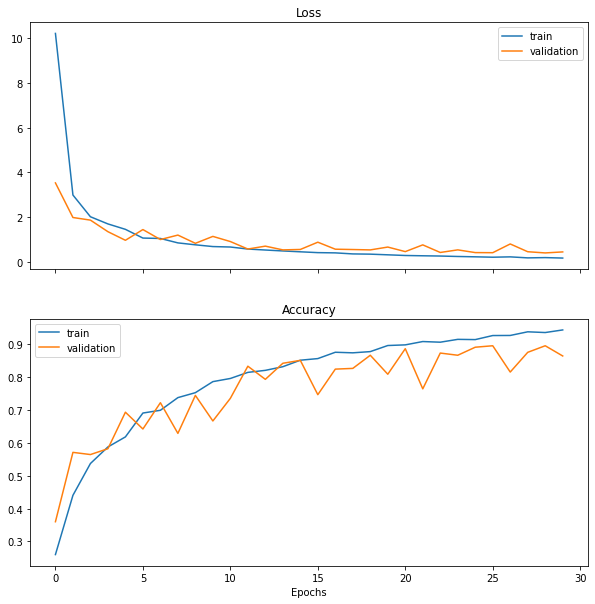

In [42]:
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, sharex=True,figsize=(10,10))
plt.xlabel("Epochs")
ax1.set_title("Loss")

ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend()

ax2.set_title("Accuracy")
ax2.plot(history.history['accuracy'], label='train')
ax2.plot(history.history['val_accuracy'], label='validation')
ax2.legend()

# Test folds performance

In [43]:
import numpy as np

loss = []
accuracy = []

for fold in [5, 7, 8, 9, 10]:
    td = Dataset(dataset_path=f"../data/processed/test_{fold}_07_18_2021.csv", test_size=0)
    x_test, y_test = td.get_splits()
    results = net.model.evaluate(x_test, y_test, batch_size=128)
    loss.append(results[0])
    accuracy.append(results[1])

print("\nAccuracy:")
print(f"\tMean: {np.mean(accuracy)} \n\tStandard deviation: {np.std(accuracy)}")

print("\nLoss:")
print(f"\tMean: {np.mean(loss)} \n\tStandard deviation: {np.std(loss)}")

7/7 [==============================] - 0s 2ms/step - loss: 2.7264 - accuracy: 0.5627

Accuracy:
	Mean: 0.4898116946220398 
	Standard deviation: 0.052734571829600674

Loss:
	Mean: 3.459368085861206 
	Standard deviation: 0.37761183926319725
